<a href="https://colab.research.google.com/github/hrshwrdhn/ai_cheat/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPort modules

In [5]:
import os
import torch, torchvision, tarfile
from torchvision.datasets.utils import download_url

from torch.utils.data import random_split

In [6]:
dataset_url = 'https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz'
download_url(dataset_url, '.')

Using downloaded and verified file: ./cifar10.tgz


In [7]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [8]:
data_dir = '/content/data/cifar10'


print(os.listdir(data_dir))

['test', 'train']


In [9]:
print(os.listdir(data_dir + "/train") )

['bird', 'deer', 'airplane', 'horse', 'frog', 'dog', 'automobile', 'ship', 'cat', 'truck']


In [10]:
classes = os.listdir(data_dir + "/train")
print(classes)

['bird', 'deer', 'airplane', 'horse', 'frog', 'dog', 'automobile', 'ship', 'cat', 'truck']


In [11]:
airplane_files = os.listdir(data_dir + '/train/airplane')

print(len(airplane_files))

5000


In [12]:
print(airplane_files[0])

4136.png


# create dataset

In [13]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor


In [14]:
dataset  = ImageFolder(data_dir + '/train' , transform = ToTensor())

In [15]:
len(dataset)

50000

In [16]:
dataset[0]

(tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
          [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
          [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
          ...,
          [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
          [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
          [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],
 
         [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
          [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
          [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
          ...,
          [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
          [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
          [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],
 
         [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
          [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
          [0.8118, 0.8157, 0.8235,  ...,

In [17]:
dataset[0][0].shape

torch.Size([3, 32, 32])

In [18]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [20]:
def show_example(img, label):
  print('label:',  dataset.classes[label])
  plt.imshow(img.permute(1,2,0))

label: automobile


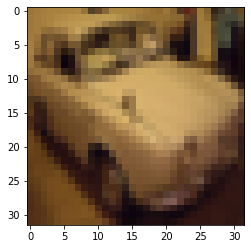

In [21]:
 show_example(*dataset[8000])

In [22]:
 a = dataset[0][0].permute(1,2,0)
 a.shape
 #plt.imshow(dataset[0][0])

torch.Size([32, 32, 3])

Training, validation dataloader

In [23]:
val_size = 5000
train_size = len(dataset) - val_size

In [24]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])

In [25]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory =True)
val_dl = DataLoader(train_ds, batch_size*2, num_workers = 4, pin_memory =True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [26]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images,labels in dl:
    fig,ax = plt.subplots(figsize = (12,6))
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(images,nrow = 16 ).permute(1,2,0)  )
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


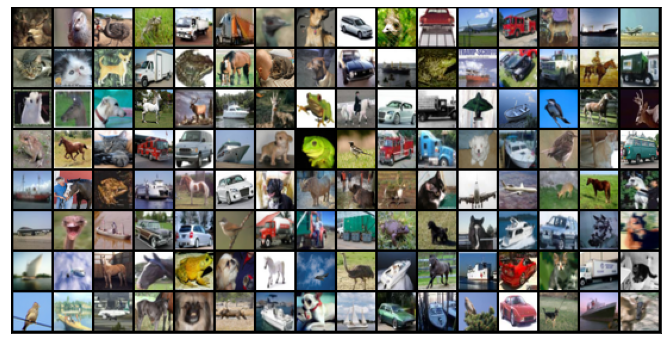

In [27]:
show_batch(train_dl)

In [28]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [29]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)


tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [34]:
simple_model = nn.Sequential( 
    nn.Conv2d(3,8, kernel_size= 3,stride = 1, padding =1),
    nn.MaxPool2d(2,2)
)

In [35]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [42]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3,32,kernel_size = 3, padding=1),  
            nn.ReLU(),
            nn.Conv2d(32,64,kernel_size = 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),  # 64x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(),
            nn.Linear(256*4*4 , 1024 ),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,10)





        ) 
            
        
    def forward(self, xb):
        return self.network(xb)

In [43]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [44]:
for images, labels in train_dl:
  print('images.shape  : ' ,images.shape )
  out = model(images)
  print('out.shape: ',out.shape)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape  :  torch.Size([128, 3, 32, 32])
out.shape:  torch.Size([128, 10])


In [46]:
out

tensor([[ 0.0381, -0.0260, -0.0393,  ..., -0.0216, -0.0225,  0.0221],
        [ 0.0383, -0.0259, -0.0391,  ..., -0.0214, -0.0226,  0.0222],
        [ 0.0383, -0.0260, -0.0392,  ..., -0.0215, -0.0226,  0.0222],
        ...,
        [ 0.0382, -0.0259, -0.0391,  ..., -0.0215, -0.0225,  0.0222],
        [ 0.0382, -0.0259, -0.0392,  ..., -0.0214, -0.0226,  0.0221],
        [ 0.0383, -0.0259, -0.0393,  ..., -0.0216, -0.0226,  0.0221]],
       grad_fn=<AddmmBackward>)

In [47]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [48]:
device = get_default_device()
device

device(type='cuda')

In [49]:
train_dl = DeviceDataLoader(train_dl,device)
val_dl = DeviceDataLoader(val_dl,device)
to_device(model,device);

In [50]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [51]:
model = to_device(Cifar10CnnModel(), device)

In [53]:
evaluate(model, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.0998881384730339, 'val_loss': 2.302790880203247}

In [54]:
opt_func = torch.optim.Adam 
lr = 0.001

num_epochs = 10



In [58]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 1.7871, val_loss: 1.3980, val_acc: 0.4749
Epoch [1], train_loss: 1.2176, val_loss: 1.0027, val_acc: 0.6375
Epoch [2], train_loss: 0.9637, val_loss: 0.8584, val_acc: 0.6954
Epoch [3], train_loss: 0.7815, val_loss: 0.6620, val_acc: 0.7682
Epoch [4], train_loss: 0.6571, val_loss: 0.5573, val_acc: 0.8058
Epoch [5], train_loss: 0.5516, val_loss: 0.4467, val_acc: 0.8437
Epoch [6], train_loss: 0.4615, val_loss: 0.3617, val_acc: 0.8764
Epoch [7], train_loss: 0.3652, val_loss: 0.2771, val_acc: 0.9023
Epoch [8], train_loss: 0.2914, val_loss: 0.1963, val_acc: 0.9346
Epoch [9], train_loss: 0.2305, val_loss: 0.1491, val_acc: 0.9492


In [56]:
model.parameters

<bound method Module.parameters of Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (1

In [59]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

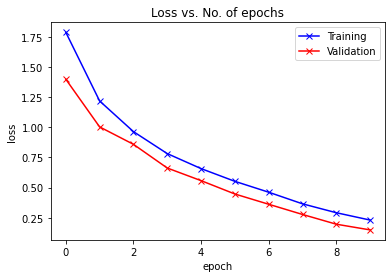

In [60]:
plot_losses(history)

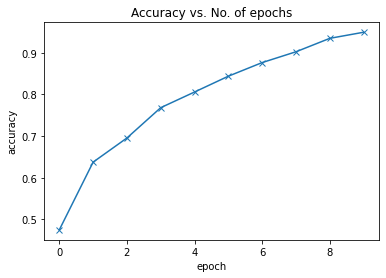

In [61]:
plot_accuracies(history)

In [62]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [63]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.7657226324081421, 'val_loss': 0.9023514986038208}

In [64]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [65]:
model2 = to_device(Cifar10CnnModel(), device)

In [66]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

In [67]:
results = evaluate(model2, test_loader)

In [68]:
results

{'val_acc': 0.7657226324081421, 'val_loss': 0.9023514986038208}